## Keras - Reconhecimento de Dígitos (MNIST)

In [ ]:
!nvidia-smi

Mon Nov 18 14:05:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, AdamW
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
%matplotlib inline

## Carregando arquivo de dígitos

In [ ]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

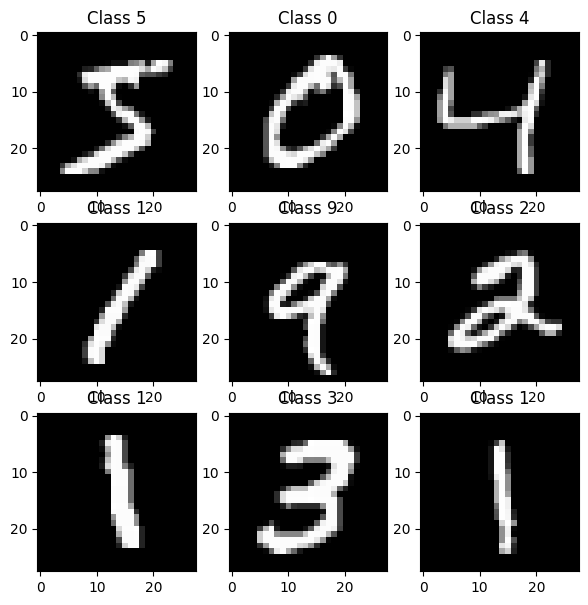

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Formatar e  Colocar os dados em Escala
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [ ]:
# codificação ONE-HOT ENCODING
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [ ]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Construindo a Rede Neural
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/figure.png" />

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.

#model.add(Dropout(0.3))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [ ]:
%%time
model.fit(X_train, Y_train,
          batch_size=256, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8389 - loss: 0.5219 - val_accuracy: 0.9651 - val_loss: 0.1154
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9671 - loss: 0.1068 - val_accuracy: 0.9631 - val_loss: 0.1135
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0660 - val_accuracy: 0.9676 - val_loss: 0.0972
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0443 - val_accuracy: 0.9780 - val_loss: 0.0737
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9786 - val_loss: 0.0710
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9934 - loss: 0.0223 - val_accuracy: 0.9782 - val_loss: 0.0760
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0175 - val_accuracy: 0.9619 - val_loss: 0.1500
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9966 - loss: 0.0124 - val_accuracy: 0.

## Finally, evaluate its performance

In [ ]:
#loss = model.evaluate(X_test, Y_test,verbose=0)
#print('Acurácia de teste:', 1 - loss)

_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.590


# CNN Model

![image](https://lh4.googleusercontent.com/ojMXAE77tiVVF3RSqK1lldysJx5OzBJdE5ng_0w7GpHYWl9GR9jjBN0p56UFW3dM3gEdS-0oTOw0IjORJXVImFvcXdD-EnFibJl06gxMN_kYTeOyfmanNEvXK59CYzt2t_3DifPG)

In [ ]:
# define cnn model
model = Sequential() # 32
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1) ) ) #
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu',  kernel_initializer='he_uniform')) #))
model.add(Dense(10, activation='softmax'))

# compile model
#opt = SGD(lr=0.01, momentum=0.9)
optimizer = AdamW(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │       1,843,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,993,174 (7.60 MB)

 Trainable params: 1,993,174 (7.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# reshape dataset to have a single channel
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255.0
X_test /= 255.0
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

# one hot encode target values
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print("y Testing matrix shape", Y_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)
y Testing matrix shape (10000, 10)


# Particiona em Treino e Validação o dataset de Treino

In [ ]:
# Particiona em Treino e Validação o dataset de Treino

X_valid=X_train[55000:]
y_valid=Y_train[55000:]

X_train=X_train[:55000]
y_train=y_train[:55000]
y_train = to_categorical(y_train)


print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_valid.shape)

Training matrix shape (55000, 28, 28, 1)
Testing matrix shape (5000, 28, 28, 1)


In [ ]:
%%time

history = model.fit(X_train, y_train,
                    epochs=20, #10, #20, # 6
                    batch_size = 128, # 512, #512,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Acurácia de Teste: %.3f' % (acc * 100.0))

Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9074 - loss: 0.2942 - val_accuracy: 0.9886 - val_loss: 0.0491
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9886 - val_loss: 0.0431
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9921 - loss: 0.0229 - val_accuracy: 0.9868 - val_loss: 0.0553
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9894 - val_loss: 0.0511
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9955 - loss: 0.0128 - val_accuracy: 0.9862 - val_loss: 0.0577
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9961 - loss: 0.0108 - val_accuracy: 0.9894 - val_loss: 0.0502
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9971 - loss: 0.0083 - val_accuracy: 0.9896 - val_loss: 0.0481
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9975 - loss: 0.0074 - val

# Avaliando meu Modelo

In [ ]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Acurácia de Teste: %.3f' % (acc * 100.0))

Acurácia de Teste: 99.070


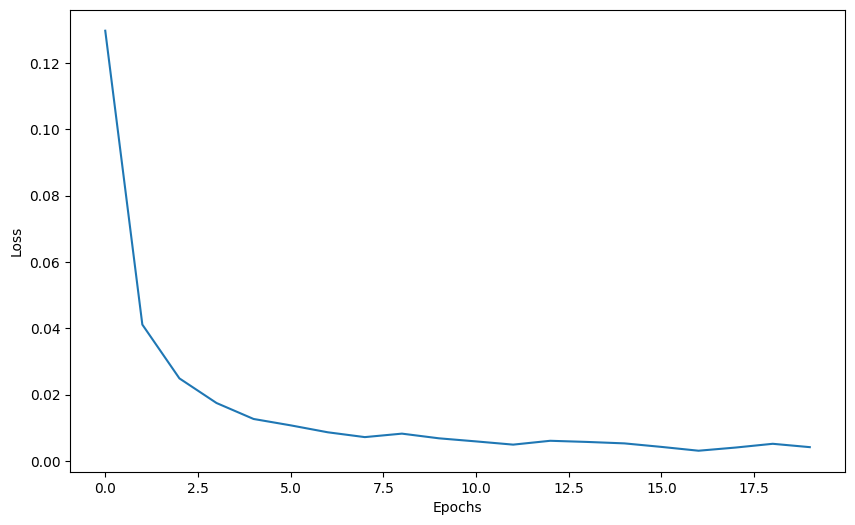

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

num_epochs = history.params['epochs' ]
plt.plot(range(num_epochs), history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

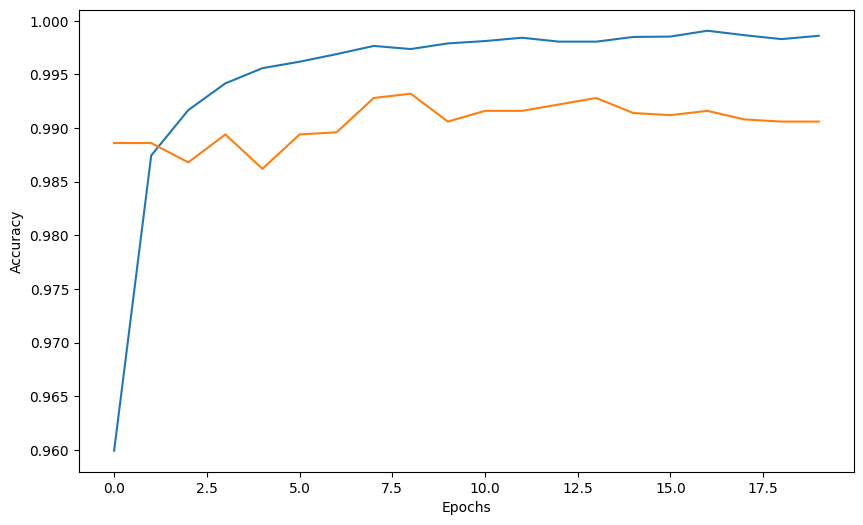

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

plt.plot(range(num_epochs), history.history['accuracy'])
plt.plot(range(num_epochs), history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

# Resultados - Métricas Pesos Sinápticos e Hiperparâmetros

In [ ]:
history.__dict__

{'params': {'verbose': 1, 'epochs': 20, 'steps': 430},
 '_model': <Sequential name=sequential_1, built=True>,
 'history': {'accuracy': [0.9599090814590454,
   0.9874363541603088,
   0.9916727542877197,
   0.9941636323928833,
   0.9955818057060242,
   0.996181845664978,
   0.9968909025192261,
   0.9976545572280884,
   0.9973636269569397,
   0.9978908896446228,
   0.9981091022491455,
   0.9984181523323059,
   0.998054563999176,
   0.998054563999176,
   0.9984909296035767,
   0.9985272884368896,
   0.9990727305412292,
   0.9986545443534851,
   0.9982908964157104,
   0.9986000061035156],
  'loss': [0.1297062784433365,
   0.04113088548183441,
   0.024911800399422646,
   0.017494725063443184,
   0.01267935149371624,
   0.010757793672382832,
   0.008668790571391582,
   0.007212385535240173,
   0.008260265924036503,
   0.0068482644855976105,
   0.005918711889535189,
   0.004946715664118528,
   0.006105254404246807,
   0.005757786333560944,
   0.005322403274476528,
   0.004260106943547726,
   0

In [ ]:
acc = history.history['accuracy']
acc

[0.9599090814590454,
 0.9874363541603088,
 0.9916727542877197,
 0.9941636323928833,
 0.9955818057060242,
 0.996181845664978,
 0.9968909025192261,
 0.9976545572280884,
 0.9973636269569397,
 0.9978908896446228,
 0.9981091022491455,
 0.9984181523323059,
 0.998054563999176,
 0.998054563999176,
 0.9984909296035767,
 0.9985272884368896,
 0.9990727305412292,
 0.9986545443534851,
 0.9982908964157104,
 0.9986000061035156]

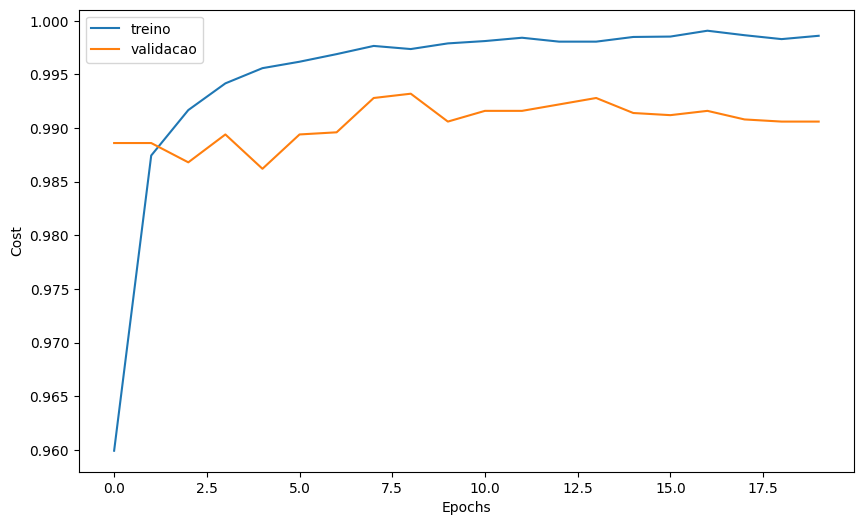

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

acc = history.history['accuracy']

plt.plot(history.epoch, acc)
plt.plot(history.epoch, history.history['val_accuracy'] )
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.legend(['treino', 'validacao'])
plt.show()

## Plotando algumas predições erradas do conjunto de teste

In [ ]:
np.set_printoptions(suppress=True, precision=30)

predict_x = model.predict(X_test)[0]
print(predict_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0.00000000000000000041764132     0.0000000000000000021328846
 0.0000000000000006919007         0.0000000000000028750782
 0.0000000000000000077931415      0.0000000000000000000029756274
 0.000000000000000000000000004598 1.
 0.00000000000011147777           0.000000000000008099455         ]


In [ ]:
predict_x = model.predict (X_test)[0]
classes_x= np.argmax(predict_x)
classes_x

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


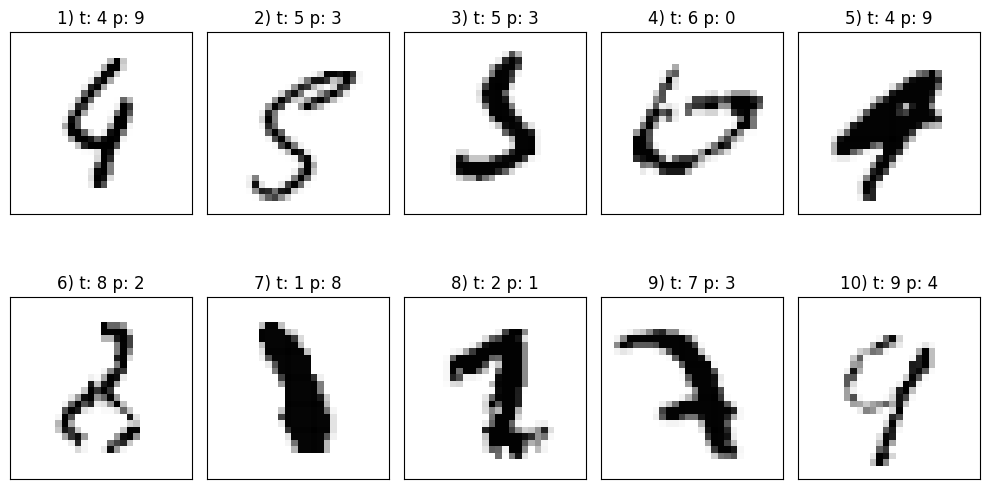

In [ ]:
# classificações incorretas
predict_x = model.predict(X_test)
y_test_pred = np.argmax(predict_x, axis=1)

#y_test_pred = np_utils.to_categorical(y_test_pred, nb_classes)

miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Plotando algumas predições Corretas do conjunto de teste

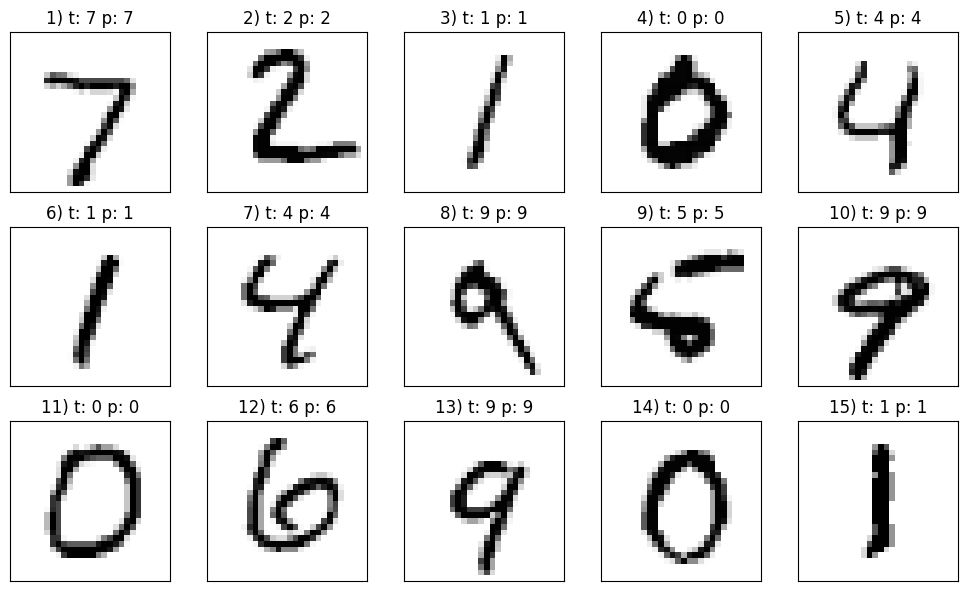

In [ ]:
# classificações corretas
miscl_img = X_test[y_test == y_test_pred][:25]
correct_lab = y_test[y_test == y_test_pred][:25]
miscl_lab = y_test_pred[y_test == y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Salvando o modelo

In [ ]:
model.save('modelo.keras')
!ls -ilah *.keras

1184623 -rw-r--r-- 1 root root 23M Nov 18 14:17 modelo.keras


# Carregando o modelo Salvo

In [ ]:
loaded_model = load_model('modelo.keras')
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.070


# Download do modelo

In [ ]:
%%time
from google.colab import files
#files.download('modelo.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CPU times: user 5.14 ms, sys: 44 µs, total: 5.18 ms
Wall time: 4.65 ms
